In [ ]:
# pip install n2v

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6

In [ ]:
# !pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.8 MB/s eta 0:00:00


=== Median Filter Denoising ===
PSNR: 28.30
SSIM: 0.7159
MSE : 0.001480

=== Wavelet Denoising ===
PSNR: 27.95
SSIM: 0.7221
MSE : 0.001603


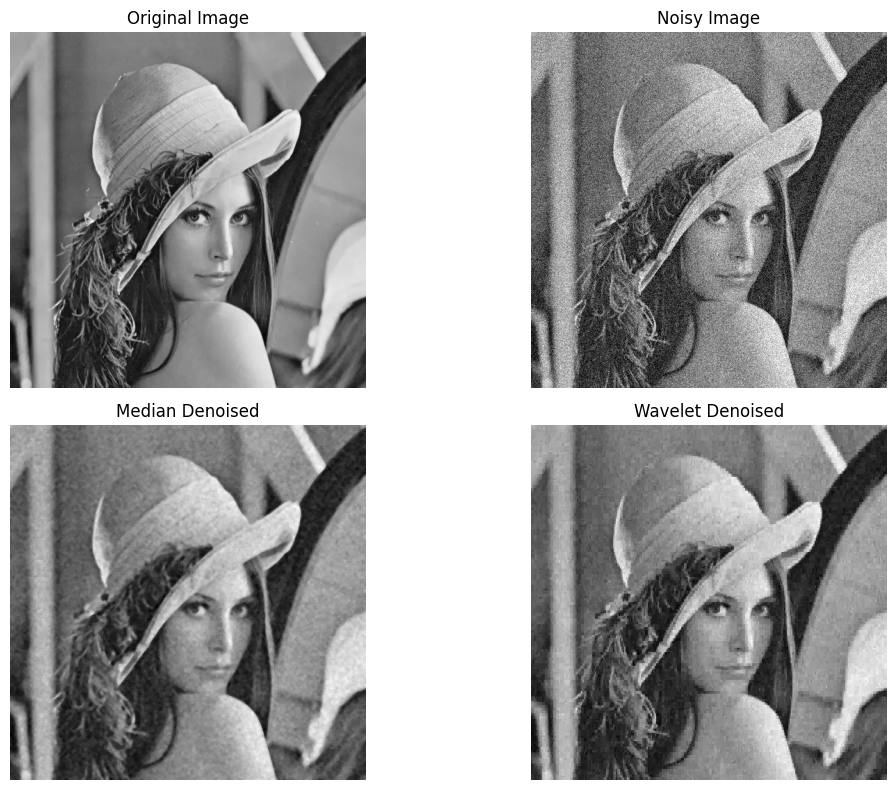

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration, metrics
from skimage.util import random_noise

# ---------------------------
# 1. Load the Image
# ---------------------------
img = cv2.imread('Lenna.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if img is None:
    raise ValueError("Image not found. Please check the filename or path.")

# Normalize the image (scale between 0-1)
img = img / 255.0

# ---------------------------
# 2. Add Artificial Gaussian Noise
# ---------------------------
noisy_img = random_noise(img, mode='gaussian')

# ---------------------------
# 3. Apply Denoising Techniques
# ---------------------------

# Median Filter (OpenCV expects 8-bit, then scale back to 0-1)
median_denoised = cv2.medianBlur((noisy_img * 255).astype(np.uint8), 5) / 255.0

# Wavelet Denoising (channel_axis=None is correct for grayscale images)
wavelet_denoised = restoration.denoise_wavelet(noisy_img, mode='soft', wavelet_levels=3, channel_axis=None)

# ---------------------------
# 4. Evaluate Metrics (PSNR, SSIM, MSE)
# ---------------------------

# Median Filter Metrics
psnr_median = metrics.peak_signal_noise_ratio(img, median_denoised)
ssim_median = metrics.structural_similarity(img, median_denoised, data_range=1.0)
mse_median = metrics.mean_squared_error(img, median_denoised)

# Wavelet Filter Metrics
psnr_wavelet = metrics.peak_signal_noise_ratio(img, wavelet_denoised)
ssim_wavelet = metrics.structural_similarity(img, wavelet_denoised, data_range=1.0)
mse_wavelet = metrics.mean_squared_error(img, wavelet_denoised)

# ---------------------------
# 5. Print Results
# ---------------------------
print("=== Median Filter Denoising ===")
print(f"PSNR: {psnr_median:.2f}")
print(f"SSIM: {ssim_median:.4f}")
print(f"MSE : {mse_median:.6f}\n")

print("=== Wavelet Denoising ===")
print(f"PSNR: {psnr_wavelet:.2f}")
print(f"SSIM: {ssim_wavelet:.4f}")
print(f"MSE : {mse_wavelet:.6f}")

# ---------------------------
# 6. Display Images
# ---------------------------

titles = ['Original Image', 'Noisy Image', 'Median Denoised', 'Wavelet Denoised']
images = [img, noisy_img, median_denoised, wavelet_denoised]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Install OpenCV if not installed
!pip install opencv-python-headless

# Import libraries
import cv2
import os
import requests

# Download the sample video if not already present
video_path = 'sample_video.mp4'
if not os.path.exists(video_path):
    print("Downloading sample video...")
    url = 'https://samplelib.com/lib/preview/mp4/sample-5s.mp4'
    r = requests.get(url)
    with open(video_path, 'wb') as f:
        f.write(r.content)
    print("Download complete!")

# Read the video using OpenCV
cam = cv2.VideoCapture(video_path)

# Check if video loaded successfully
if not cam.isOpened():
    print("Error: Cannot open video.")
    exit()

# Create a folder to store frames
os.makedirs('data', exist_ok=True)

# Frame counter
currentframe = 0

# Read until the end
while True:
    ret, frame = cam.read()
    if ret:
        name = './data/frame' + str(currentframe) + '.jpg'
        print('Creating...' + name)
        cv2.imwrite(name, frame)
        currentframe += 1
    else:
        break

# Release resources
cam.release()
cv2.destroyAllWindows()
print(f"Done! Extracted {currentframe} frames.")


Download complete!
Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
C

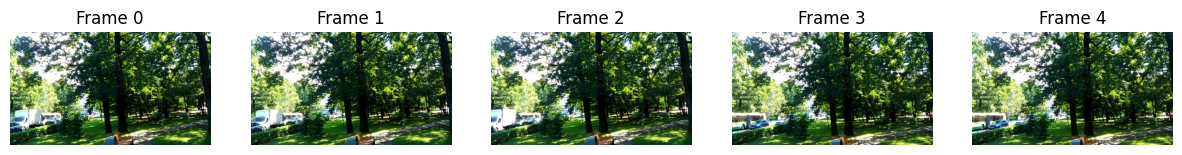

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

# Show 5 sample frames
frame_files = sorted(glob.glob('./data/*.jpg'))[:5]

plt.figure(figsize=(15,5))
for idx, file in enumerate(frame_files):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Frame {idx}')
plt.show()


In [ ]:
#Adaptive Threshold
import cv2
from google.colab.patches import cv2_imshow

# Read the video from the path
video_path = 'sample_video.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Loop until the end of the video
    while (cap.isOpened()):
        ret, frame = cap.read()

        # Check if frame is read correctly
        if not ret:
            break

        # Resize the frame for display
        frame_resized = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

        # Display the resulting frame using cv2_imshow (as cv2.imshow() doesn't work in Colab)
        cv2_imshow(frame_resized)

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding to the grayscale image
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY_INV, 11, 2)

        # Display the thresholded frame using cv2_imshow
        cv2_imshow(thresh)

        # Pause for 25ms to simulate video playback (optional)
        # (cv2.waitKey is not needed in Colab, so we simulate this with a time delay)
        import time
        time.sleep(0.04)  # Adjust the sleep time for playback speed

    # Release the video capture object
    cap.release()

    # Cleanup (not needed in Colab, but good practice)
    print("Video playback finished.")


In [ ]:
#blur
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample_video.mp4')  # Make sure the video file is uploaded

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Loop until the end of the video
    while (cap.isOpened()):
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame for display
        frame_resized = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

        # Display the original frame using cv2_imshow
        cv2_imshow(frame_resized)

        # Apply Gaussian Blur
        gaussianblur = cv2.GaussianBlur(frame_resized, (5, 5), 0)

        # Display the smoothened (blurred) frame
        cv2_imshow(gaussianblur)

        # Pause for 25ms to simulate video playback (optional)
        import time
        time.sleep(0.04)  # Adjust the sleep time for playback speed

    # Release the video capture object
    cap.release()

    # Cleanup (not needed in Colab, but good practice)
    print("Video playback finished.")


In [ ]:
#edge
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample_video.mp4')  # Make sure the video is uploaded

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Loop until the end of the video
    while (cap.isOpened()):
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame for display
        frame_resized = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

        # Display the original frame using cv2_imshow
        cv2_imshow(frame_resized)

        # Using cv2.Canny() for edge detection
        edge_detect = cv2.Canny(frame_resized, 100, 200)

        # Display the edge-detected frame
        cv2_imshow(edge_detect)

        # Pause for 25ms to simulate video playback
        import time
        time.sleep(0.04)  # Adjust this to control playback speed

    # Release the video capture object
    cap.release()

    print("Video playback finished.")


In [ ]:
#bitwise
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample_video.mp4')  # Make sure the video is uploaded

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Loop until the end of the video
    while (cap.isOpened()):
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame for display
        frame_resized = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

        # Display the original frame using cv2_imshow
        cv2_imshow(frame_resized)

        # Conversion of BGR to grayscale is necessary to apply this operation
        gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

        # Apply thresholding
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply NOT operation on image and mask generated by thresholding
        BIT = cv2.bitwise_not(frame_resized, frame_resized, mask=mask)

        # Display the BIT result
        cv2_imshow(BIT)

        # Pause for 25ms to simulate video playback
        import time
        time.sleep(0.04)  # Adjust this to control playback speed

    # Release the video capture object
    cap.release()

    print("Video playback finished.")


Processed video created successfully.


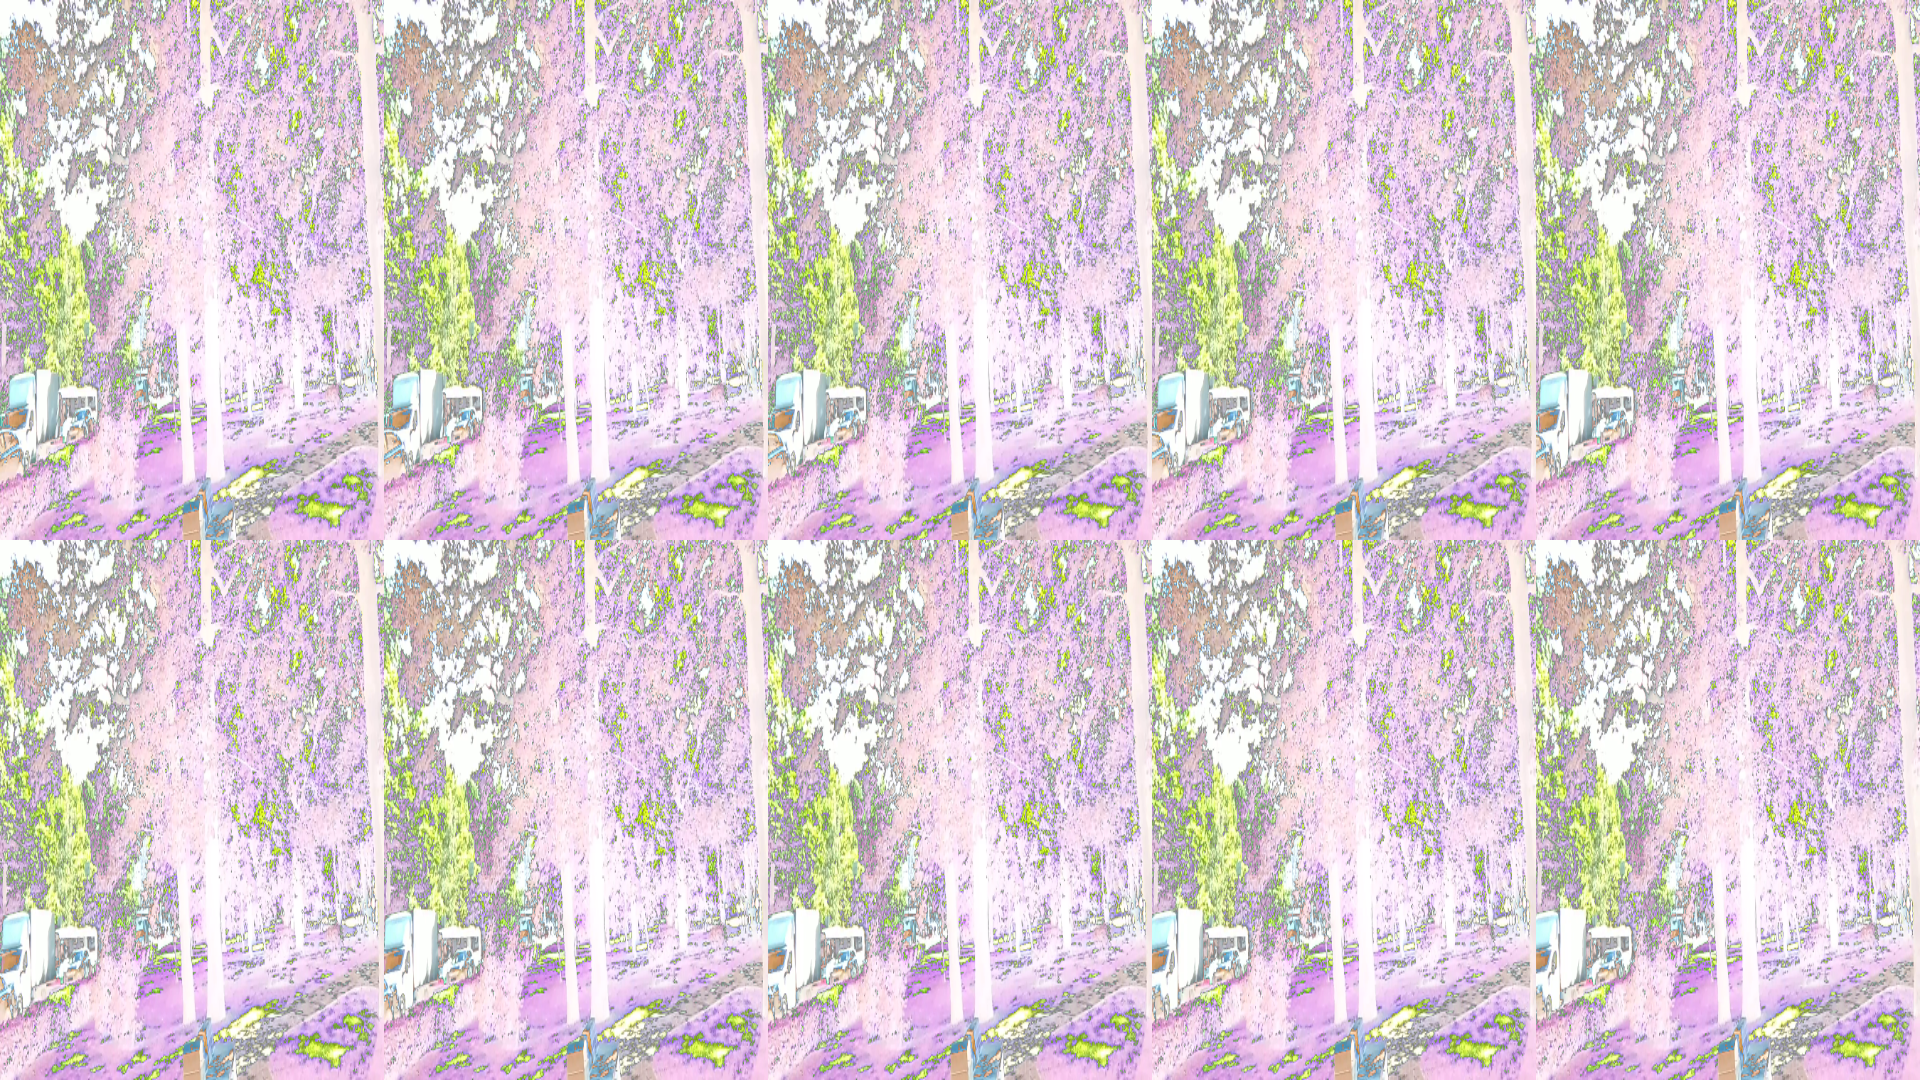

Collage created and saved successfully.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample_video.mp4')  # Ensure the video is uploaded

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Initialize list to store processed frames for the collage
    processed_frames = []

    # Get video frame width, height, and fps
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Initialize the VideoWriter to write the new video (output.avi)
    out = cv2.VideoWriter('output_video.avi',
                          cv2.VideoWriter_fourcc(*'XVID'),
                          fps, (frame_width, frame_height))

    # Loop until the end of the video
    while (cap.isOpened()):
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame for display
        frame_resized = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

        # Convert BGR to grayscale for the bitwise NOT operation
        gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

        # Apply thresholding
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply NOT operation on image and mask generated by thresholding
        BIT = cv2.bitwise_not(frame_resized, frame_resized, mask=mask)

        # Store the processed frame for collage
        processed_frames.append(BIT)

        # Write the processed frame to the new video
        out.write(BIT)

        # Pause for 25ms to simulate video playback
        import time
        time.sleep(0.04)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print("Processed video created successfully.")

    # Create a collage using a selection of frames
    collage_rows = 2  # Number of rows in the collage
    collage_cols = 5  # Number of columns in the collage

    collage_frames = processed_frames[:collage_rows * collage_cols]  # Select frames for collage
    collage = None

    # Combine the frames into a collage (resize each frame if necessary)
    for i in range(collage_rows):
        row_frames = collage_frames[i*collage_cols:(i+1)*collage_cols]

        # Resize each frame in the row to the same size
        row_frames_resized = [cv2.resize(f, (frame_width // collage_cols, frame_height // collage_rows)) for f in row_frames]

        # Stack the frames horizontally in a row
        row_collage = np.hstack(row_frames_resized)

        if collage is None:
            collage = row_collage
        else:
            # Stack the rows vertically
            collage = np.vstack([collage, row_collage])

    # Display the collage
    cv2_imshow(collage)

    # Save the collage image
    cv2.imwrite('collage_output.jpg', collage)

    print("Collage created and saved successfully.")


In [ ]:
#task 2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pevogam/ucf101")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ucf101


In [ ]:
import shutil

# Move the extracted dataset to /content
shutil.copytree('/kaggle/input/ucf101', '/content/UCF101')


'/content/UCF101'

In [ ]:
import os
import cv2
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Dense


In [ ]:
# Settings
DATASET_PATH = '/content//UCF101/UCF101/UCF-101/'  # path where UCF101 extracted
selected_classes = ['Basketball', 'Typing', 'GolfSwing', 'WalkingWithDog', 'PlayingGuitar']
frames_per_video = 16
img_height, img_width = 112, 112

def load_ucf101_data(dataset_path, selected_classes, frames=16):
    X = []
    y = []

    for class_name in selected_classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = os.listdir(class_path)

        for video_file in video_files:
            video_path = os.path.join(class_path, video_file)
            frames_list = []

            cap = cv2.VideoCapture(video_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if total_frames < frames:
                continue  # skip videos with too few frames

            frame_indices = np.linspace(0, total_frames-1, frames, dtype=int)

            for idx in frame_indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
                ret, frame = cap.read()
                if ret:
                    frame = cv2.resize(frame, (img_width, img_height))
                    frame = frame / 255.0
                    frames_list.append(frame)
                else:
                    break

            cap.release()

            if len(frames_list) == frames:
                X.append(frames_list)
                y.append(class_name)

    return np.array(X), np.array(y)

# Load dataset
X, y = load_ucf101_data(DATASET_PATH, selected_classes, frames=frames_per_video)

print("Data loaded:", X.shape, y.shape)


Data loaded: (666, 16, 112, 112, 3) (666,)


In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

num_classes = len(selected_classes)


Train: (532, 16, 112, 112, 3) (532, 5)
Test: (134, 16, 112, 112, 3) (134, 5)


In [ ]:
# Define model
model = Sequential([
    Conv3D(32, (3,3,3), activation='relu', padding='same', input_shape=(frames_per_video, img_height, img_width, 3)),
    MaxPooling3D((2,2,2)),

    Conv3D(64, (3,3,3), activation='relu', padding='same'),
    MaxPooling3D((2,2,2)),

    Conv3D(128, (3,3,3), activation='relu', padding='same'),
    GlobalAveragePooling3D(),

    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 16, 112, 112,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 8, 56, 56, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 8, 56, 56, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 4, 28, 28, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 4, 28, 28, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,605 (1.20 MB)

 Trainable params: 313,605 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

print("Class weights:", class_weights)


Class weights: {0: np.float64(1.064), 1: np.float64(1.0431372549019609), 2: np.float64(0.83125), 3: np.float64(0.9761467889908257), 4: np.float64(1.1440860215053763)}


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=8,
    class_weight=class_weights
)


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.1747 - loss: 1.6265 - val_accuracy: 0.3284 - val_loss: 1.5479
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3163 - loss: 1.5046 - val_accuracy: 0.3284 - val_loss: 1.2487
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.4545 - loss: 1.2015 - val_accuracy: 0.4627 - val_loss: 1.1052
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.4773 - loss: 1.0975 - val_accuracy: 0.5299 - val_loss: 1.0906
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5662 - loss: 1.0801 - val_accuracy: 0.5746 - val_loss: 0.9766
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5508 - loss: 1.0174 - val_accuracy: 0.6343 - val_loss: 0.8725
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6355 - loss: 0.9121 - val_accuracy: 0.6567 - val_loss: 0.8158
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.6552 - loss: 0.7995 - val_accuracy: 0.6791 

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8118 - loss: 0.9082
Test Loss: 0.8519, Test Accuracy: 0.8209
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step

Classification Report:
                precision    recall  f1-score   support

    Basketball       0.68      0.60      0.64        25
     GolfSwing       1.00      0.58      0.73        26
 PlayingGuitar       0.86      1.00      0.93        32
        Typing       0.93      1.00      0.96        27
WalkingWithDog       0.68      0.88      0.76        24

      accuracy                           0.82       134
     macro avg       0.83      0.81      0.81       134
  weighted avg       0.84      0.82      0.81       134


Confusion Matrix:
[[15  0  5  0  5]
 [ 4 15  0  2  5]
 [ 0  0 32  0  0]
 [ 0  0  0 27  0]
 [ 3  0  0  0 21]]
